# Random Forest Word Embeddings

## Preprocessing 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cd drive/MyDrive/NLP_Project

In [1]:
# !pip install pandas matplotlib tqdm seaborn sklearn numpy graphviz
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('always') 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pickle as pk

In [2]:
trainData = np.load('fin_t2_train.npy')
trainLabels = open('finalTrainLabels.labels', 'r').readlines()
testData = np.load('fin_t2_test.npy')
testLabels = open('finalTestLabels.labels', 'r').readlines()
validationData = np.load('fin_t2_trial.npy')
validationLabels = open('finalDevLabels.labels', 'r').readlines()

/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_97249/785918980.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalTrainLabels.labels' mode='r' encoding='UTF-8'>
  trainLabels = open('finalTrainLabels.labels', 'r').readlines()
/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_97249/785918980.py:4: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalTestLabels.labels' mode='r' encoding='UTF-8'>
  testLabels = open('finalTestLabels.labels', 'r').readlines()
/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_97249/785918980.py:6: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalDevLabels.labels' mode='r' encoding='UTF-8'>
  validationLabels = open('finalDevLabels.labels', 'r').readlines()


In [3]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])
for i in tqdm(range(len(validationLabels))):
    validationLabels[i] = int(validationLabels[i])

100%|██████████| 10008/10008 [00:00<00:00, 681559.93it/s]


In [4]:
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
validationLabels = np.array(validationLabels)
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))
validationLabels = validationLabels.reshape((-1, ))
X_train, X_test, y_train, y_test, X_val, y_val = trainData, testData, trainLabels, testLabels, validationData, validationLabels

## Max Depth


In [5]:
test_accuracy = []
train_accuracy = []
trial_accuracy = []
predVal = []
for i in tqdm(range(1,30,1)):
    clf = RandomForestClassifier(criterion='gini', max_depth=i, random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    y_true = testLabels
    predVal.append(i)
    print("Test Data:")
    print("Classification report for case: ",i)
    acc = round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2)
    print("Accuracy % : ", acc)
    test_accuracy.append(acc)
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

    y_pred = clf.predict(trainData)
    y_true = trainLabels
    print("Train Data:")
    print("Classification report for case: ",i)
    acc = round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2)
    print("Accuracy % : ", acc)
    train_accuracy.append(acc)
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

    y_pred = clf.predict(validationData)
    y_true = validationLabels
    print("Validation Data:")
    print("Classification report for case: ",i)
    print("Accuracy % : ", acc)
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    trial_accuracy.append(acc)


  0%|          | 0/29 [00:00<?, ?it/s]

Test Data:
Classification report for case:  1
Accuracy % :  21.56
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.00      0.00      0.00       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17   

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1

Train Data:
Classification report for case:  1
Accuracy % :  21.56
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7076
           2       0.00      0.00      0.00      6842
           3       0.00      0.00      0.00      3842
           4       0.00      0.00      0.00      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.00      0.00      0.00      2433
          12       0.00      0.00      0.00      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1

Validation Data:
Classification report for case:  1
Accuracy % :  21.56
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.00      0.00      0.00       978
           3       0.00      0.00      0.00       549
           4       0.00      0.00      0.00       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.00      0.00      0.00       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1

Train Data:
Classification report for case:  2
Accuracy % :  21.56
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7076
           2       0.00      0.00      0.00      6842
           3       0.00      0.00      0.00      3842
           4       0.00      0.00      0.00      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.00      0.00      0.00      2433
          12       0.00      0.00      0.00      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  2
Accuracy % :  21.56
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.00      0.00      0.00       978
           3       0.00      0.00      0.00       549
           4       0.00      0.00      0.00       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.00      0.00      0.00       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  3
Accuracy % :  21.64
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7076
           2       0.00      0.00      0.00      6842
           3       0.00      0.00      0.00      3842
           4       1.00      0.00      0.00      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.94      0.02      0.04      2433
          12       0.00      0.00      0.00      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  3
Accuracy % :  21.64
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.00      0.00      0.00       978
           3       0.00      0.00      0.00       549
           4       0.00      0.00      0.00       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.00      0.00      0.00       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  4
Accuracy % :  22.01
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7076
           2       1.00      0.00      0.00      6842
           3       0.00      0.00      0.00      3842
           4       1.00      0.00      0.00      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.92      0.03      0.06      2433
          12       0.00      0.00      0.00      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  4
Accuracy % :  22.01
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.00      0.00      0.00       978
           3       0.00      0.00      0.00       549
           4       0.00      0.00      0.00       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.83      0.01      0.03       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  5
Accuracy % :  22.13
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      7076
           2       1.00      0.00      0.00      6842
           3       0.00      0.00      0.00      3842
           4       1.00      0.00      0.00      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.92      0.03      0.06      2433
          12       0.00      0.00      0.00      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  5
Accuracy % :  22.13
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.00      0.00      0.00       978
           3       0.00      0.00      0.00       549
           4       1.00      0.00      0.00       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.83      0.01      0.03       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  6
Accuracy % :  22.39
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7076
           2       0.83      0.01      0.01      6842
           3       0.00      0.00      0.00      3842
           4       0.90      0.02      0.03      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.94      0.05      0.09      2433
          12       0.00      0.00      0.00      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  6
Accuracy % :  22.39
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       1.00      0.00      0.00       978
           3       0.00      0.00      0.00       549
           4       1.00      0.00      0.00       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.86      0.02      0.03       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  7
Accuracy % :  22.68
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      7076
           2       0.85      0.02      0.03      6842
           3       0.00      0.00      0.00      3842
           4       0.95      0.03      0.05      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.93      0.07      0.14      2433
          12       1.00      0.00      0.00      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  7
Accuracy % :  22.68
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       1.00      0.00      0.01       978
           3       0.00      0.00      0.00       549
           4       1.00      0.00      0.00       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.86      0.02      0.03       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  8
Accuracy % :  23.16
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      7076
           2       0.89      0.03      0.06      6842
           3       0.00      0.00      0.00      3842
           4       0.91      0.06      0.11      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.92      0.08      0.14      2433
          12       1.00      0.00      0.01      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  8
Accuracy % :  23.16
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       1.00      0.01      0.01       978
           3       0.00      0.00      0.00       549
           4       0.83      0.02      0.05       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.83      0.01      0.03       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  9
Accuracy % :  23.7
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      7076
           2       0.82      0.05      0.09      6842
           3       0.00      0.00      0.00      3842
           4       0.92      0.09      0.16      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.89      0.10      0.18      2433
          12       0.90      0.00      0.01      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17   

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  9
Accuracy % :  23.7
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.89      0.01      0.02       978
           3       0.00      0.00      0.00       549
           4       1.00      0.02      0.04       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.75      0.03      0.05       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
          

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  10
Accuracy % :  24.01
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      7076
           2       0.85      0.05      0.09      6842
           3       1.00      0.00      0.00      3842
           4       0.87      0.11      0.20      4363
           5       0.00      0.00      0.00      2751
           6       1.00      0.00      0.00      2831
           7       1.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.91      0.11      0.20      2433
          12       0.96      0.01      0.02      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  10
Accuracy % :  24.01
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.84      0.02      0.03       978
           3       0.00      0.00      0.00       549
           4       1.00      0.02      0.04       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.86      0.02      0.03       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  11
Accuracy % :  24.37
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      7076
           2       0.75      0.07      0.12      6842
           3       1.00      0.00      0.00      3842
           4       0.85      0.13      0.22      4363
           5       1.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.90      0.00      0.01      3250
           8       0.00      0.00      0.00      2341
           9       1.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.92      0.13      0.23      2433
          12       0.97      0.02      0.03      1908
          13       0.00      0.00      0.00      1722
          14       1.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  11
Accuracy % :  24.37
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.83      0.02      0.04       978
           3       0.00      0.00      0.00       549
           4       0.81      0.07      0.12       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.74      0.05      0.09       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  12
Accuracy % :  24.67
              precision    recall  f1-score   support

           1       1.00      0.00      0.01      7076
           2       0.77      0.07      0.12      6842
           3       1.00      0.00      0.00      3842
           4       0.85      0.13      0.23      4363
           5       1.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.95      0.01      0.01      3250
           8       0.00      0.00      0.00      2341
           9       1.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.92      0.14      0.24      2433
          12       0.93      0.04      0.08      1908
          13       0.00      0.00      0.00      1722
          14       1.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  12
Accuracy % :  24.67
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.79      0.02      0.03       978
           3       0.00      0.00      0.00       549
           4       0.79      0.05      0.09       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.55      0.05      0.09       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  13
Accuracy % :  25.03
              precision    recall  f1-score   support

           1       0.96      0.00      0.01      7076
           2       0.76      0.07      0.13      6842
           3       1.00      0.00      0.01      3842
           4       0.85      0.14      0.24      4363
           5       1.00      0.00      0.00      2751
           6       1.00      0.00      0.00      2831
           7       0.96      0.01      0.02      3250
           8       0.00      0.00      0.00      2341
           9       1.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.93      0.14      0.25      2433
          12       0.97      0.09      0.16      1908
          13       0.00      0.00      0.00      1722
          14       1.00      0.00      0.00      1878
          15       1.00      0.00      0.00      1745
          16       1.00      0.00      0.00      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  13
Accuracy % :  25.03
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.85      0.02      0.04       978
           3       0.00      0.00      0.00       549
           4       0.94      0.03      0.05       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.77      0.05      0.09       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  14
Accuracy % :  25.42
              precision    recall  f1-score   support

           1       0.98      0.01      0.01      7076
           2       0.78      0.07      0.13      6842
           3       1.00      0.01      0.01      3842
           4       0.85      0.15      0.25      4363
           5       1.00      0.00      0.01      2751
           6       1.00      0.00      0.01      2831
           7       0.97      0.01      0.02      3250
           8       1.00      0.00      0.00      2341
           9       1.00      0.00      0.01      1992
          10       0.00      0.00      0.00      2083
          11       0.94      0.15      0.26      2433
          12       0.96      0.11      0.19      1908
          13       1.00      0.00      0.00      1722
          14       1.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       1.00      0.00      0.00      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

Validation Data:
Classification report for case:  14
Accuracy % :  25.42
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.85      0.03      0.06       978
           3       0.00      0.00      0.00       549
           4       0.83      0.03      0.06       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.78      0.05      0.10       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  15
Accuracy % :  25.75
              precision    recall  f1-score   support

           1       0.97      0.01      0.02      7076
           2       0.78      0.08      0.14      6842
           3       1.00      0.01      0.03      3842
           4       0.83      0.15      0.25      4363
           5       1.00      0.00      0.01      2751
           6       1.00      0.00      0.01      2831
           7       0.98      0.01      0.03      3250
           8       1.00      0.00      0.01      2341
           9       1.00      0.01      0.02      1992
          10       1.00      0.00      0.00      2083
          11       0.93      0.17      0.28      2433
          12       0.96      0.14      0.24      1908
          13       1.00      0.00      0.00      1722
          14       1.00      0.00      0.00      1878
          15       1.00      0.00      0.00      1745
          16       1.00      0.00      0.00      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 52%|█████▏    | 15/29 [16:32<19:36, 84.03s/it]

Validation Data:
Classification report for case:  15
Accuracy % :  25.75
              precision    recall  f1-score   support

           1       0.05      0.00      0.00      1011
           2       0.67      0.02      0.05       978
           3       0.00      0.00      0.00       549
           4       0.83      0.07      0.13       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.76      0.05      0.10       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  16
Accuracy % :  26.37
              precision    recall  f1-score   support

           1       0.97      0.02      0.03      7076
           2       0.78      0.08      0.15      6842
           3       1.00      0.02      0.04      3842
           4       0.84      0.15      0.26      4363
           5       1.00      0.01      0.02      2751
           6       1.00      0.01      0.02      2831
           7       0.99      0.02      0.05      3250
           8       1.00      0.00      0.01      2341
           9       1.00      0.01      0.03      1992
          10       1.00      0.00      0.00      2083
          11       0.94      0.18      0.30      2433
          12       0.97      0.15      0.26      1908
          13       1.00      0.00      0.01      1722
          14       1.00      0.00      0.01      1878
          15       1.00      0.00      0.00      1745
          16       1.00      0.00      0.01      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 55%|█████▌    | 16/29 [18:05<18:45, 86.60s/it]

Validation Data:
Classification report for case:  16
Accuracy % :  26.37
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.70      0.02      0.03       978
           3       0.00      0.00      0.00       549
           4       0.81      0.10      0.18       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.77      0.06      0.11       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  17
Accuracy % :  26.92
              precision    recall  f1-score   support

           1       0.99      0.02      0.04      7076
           2       0.81      0.09      0.17      6842
           3       1.00      0.03      0.05      3842
           4       0.85      0.16      0.27      4363
           5       1.00      0.01      0.02      2751
           6       0.98      0.02      0.03      2831
           7       0.98      0.03      0.06      3250
           8       1.00      0.01      0.02      2341
           9       1.00      0.02      0.04      1992
          10       1.00      0.00      0.01      2083
          11       0.96      0.21      0.34      2433
          12       0.92      0.16      0.27      1908
          13       1.00      0.01      0.01      1722
          14       1.00      0.00      0.01      1878
          15       1.00      0.00      0.01      1745
          16       1.00      0.01      0.01      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 59%|█████▊    | 17/29 [20:05<19:18, 96.54s/it]

Validation Data:
Classification report for case:  17
Accuracy % :  26.92
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.83      0.02      0.04       978
           3       0.10      0.01      0.01       549
           4       0.78      0.11      0.19       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.75      0.07      0.13       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  18
Accuracy % :  27.29
              precision    recall  f1-score   support

           1       0.99      0.03      0.05      7076
           2       0.82      0.10      0.18      6842
           3       1.00      0.04      0.07      3842
           4       0.87      0.17      0.28      4363
           5       1.00      0.01      0.03      2751
           6       0.98      0.02      0.04      2831
           7       0.99      0.04      0.07      3250
           8       1.00      0.01      0.02      2341
           9       1.00      0.02      0.04      1992
          10       1.00      0.00      0.01      2083
          11       0.96      0.21      0.34      2433
          12       0.92      0.16      0.28      1908
          13       1.00      0.01      0.02      1722
          14       1.00      0.01      0.01      1878
          15       1.00      0.00      0.01      1745
          16       1.00      0.01      0.02      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 62%|██████▏   | 18/29 [22:30<20:22, 111.13s/it]

Validation Data:
Classification report for case:  18
Accuracy % :  27.29
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.77      0.05      0.09       978
           3       0.00      0.00      0.00       549
           4       0.79      0.10      0.18       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.71      0.05      0.09       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  19
Accuracy % :  28.0
              precision    recall  f1-score   support

           1       0.99      0.04      0.07      7076
           2       0.82      0.11      0.20      6842
           3       1.00      0.04      0.08      3842
           4       0.88      0.17      0.28      4363
           5       1.00      0.02      0.04      2751
           6       0.99      0.03      0.05      2831
           7       0.98      0.05      0.10      3250
           8       1.00      0.03      0.05      2341
           9       1.00      0.04      0.07      1992
          10       1.00      0.01      0.02      2083
          11       0.96      0.23      0.37      2433
          12       0.93      0.17      0.29      1908
          13       1.00      0.02      0.03      1722
          14       1.00      0.01      0.02      1878
          15       1.00      0.01      0.01      1745
          16       1.00      0.01      0.02      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 66%|██████▌   | 19/29 [25:27<21:50, 131.02s/it]

Validation Data:
Classification report for case:  19
Accuracy % :  28.0
              precision    recall  f1-score   support

           1       0.06      0.00      0.00      1011
           2       0.54      0.06      0.11       978
           3       0.14      0.00      0.00       549
           4       0.85      0.06      0.12       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.67      0.01      0.02       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.81      0.09      0.16       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  20
Accuracy % :  28.54
              precision    recall  f1-score   support

           1       0.99      0.05      0.10      7076
           2       0.86      0.12      0.22      6842
           3       1.00      0.05      0.10      3842
           4       0.89      0.18      0.30      4363
           5       1.00      0.02      0.05      2751
           6       0.99      0.03      0.06      2831
           7       0.99      0.06      0.11      3250
           8       0.98      0.02      0.04      2341
           9       1.00      0.04      0.08      1992
          10       1.00      0.01      0.02      2083
          11       0.97      0.24      0.38      2433
          12       0.94      0.18      0.30      1908
          13       1.00      0.02      0.04      1722
          14       1.00      0.01      0.03      1878
          15       1.00      0.01      0.02      1745
          16       1.00      0.02      0.03      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 69%|██████▉   | 20/29 [28:47<22:44, 151.63s/it]

Validation Data:
Classification report for case:  20
Accuracy % :  28.54
              precision    recall  f1-score   support

           1       0.06      0.00      0.00      1011
           2       0.78      0.04      0.08       978
           3       0.05      0.00      0.01       549
           4       0.83      0.09      0.17       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.63      0.07      0.12       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  21
Accuracy % :  29.25
              precision    recall  f1-score   support

           1       1.00      0.06      0.11      7076
           2       0.88      0.14      0.25      6842
           3       1.00      0.06      0.11      3842
           4       0.89      0.19      0.31      4363
           5       1.00      0.03      0.06      2751
           6       0.99      0.04      0.08      2831
           7       0.97      0.07      0.12      3250
           8       0.99      0.03      0.07      2341
           9       1.00      0.05      0.10      1992
          10       1.00      0.01      0.03      2083
          11       0.98      0.24      0.39      2433
          12       0.96      0.18      0.30      1908
          13       1.00      0.02      0.04      1722
          14       1.00      0.02      0.04      1878
          15       1.00      0.02      0.03      1745
          16       1.00      0.02      0.04      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 72%|███████▏  | 21/29 [31:31<20:42, 155.36s/it]

Validation Data:
Classification report for case:  21
Accuracy % :  29.25
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.62      0.07      0.12       978
           3       0.00      0.00      0.00       549
           4       0.72      0.13      0.22       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.76      0.11      0.19       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  22
Accuracy % :  30.12
              precision    recall  f1-score   support

           1       0.99      0.08      0.15      7076
           2       0.88      0.16      0.27      6842
           3       1.00      0.07      0.13      3842
           4       0.92      0.20      0.33      4363
           5       0.94      0.04      0.08      2751
           6       0.99      0.04      0.08      2831
           7       0.99      0.07      0.14      3250
           8       1.00      0.05      0.10      2341
           9       1.00      0.07      0.13      1992
          10       1.00      0.01      0.03      2083
          11       0.98      0.25      0.40      2433
          12       0.98      0.19      0.32      1908
          13       1.00      0.03      0.06      1722
          14       1.00      0.02      0.05      1878
          15       1.00      0.02      0.05      1745
          16       1.00      0.02      0.05      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 76%|███████▌  | 22/29 [34:27<18:50, 161.45s/it]

Validation Data:
Classification report for case:  22
Accuracy % :  30.12
              precision    recall  f1-score   support

           1       0.15      0.00      0.00      1011
           2       0.60      0.06      0.11       978
           3       0.00      0.00      0.00       549
           4       0.80      0.12      0.21       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.75      0.11      0.20       348
          12       1.00      0.00      0.01       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  23
Accuracy % :  30.95
              precision    recall  f1-score   support

           1       1.00      0.09      0.17      7076
           2       0.90      0.17      0.29      6842
           3       1.00      0.08      0.16      3842
           4       0.92      0.21      0.35      4363
           5       0.94      0.05      0.09      2751
           6       0.99      0.05      0.10      2831
           7       0.98      0.08      0.16      3250
           8       0.99      0.05      0.10      2341
           9       1.00      0.08      0.15      1992
          10       1.00      0.02      0.04      2083
          11       0.98      0.26      0.41      2433
          12       0.95      0.21      0.35      1908
          13       1.00      0.04      0.07      1722
          14       1.00      0.03      0.06      1878
          15       1.00      0.03      0.05      1745
          16       1.00      0.04      0.07      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 79%|███████▉  | 23/29 [37:27<16:43, 167.27s/it]

Validation Data:
Classification report for case:  23
Accuracy % :  30.95
              precision    recall  f1-score   support

           1       0.04      0.00      0.00      1011
           2       0.62      0.05      0.09       978
           3       0.10      0.01      0.03       549
           4       0.71      0.13      0.23       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.70      0.09      0.17       348
          12       1.00      0.02      0.04       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  24
Accuracy % :  32.1
              precision    recall  f1-score   support

           1       0.99      0.12      0.21      7076
           2       0.92      0.20      0.32      6842
           3       1.00      0.11      0.19      3842
           4       0.92      0.22      0.36      4363
           5       0.95      0.06      0.11      2751
           6       1.00      0.07      0.13      2831
           7       0.99      0.10      0.18      3250
           8       0.99      0.07      0.13      2341
           9       1.00      0.09      0.17      1992
          10       1.00      0.03      0.06      2083
          11       0.98      0.27      0.43      2433
          12       0.96      0.23      0.37      1908
          13       1.00      0.04      0.08      1722
          14       1.00      0.04      0.08      1878
          15       1.00      0.03      0.07      1745
          16       1.00      0.04      0.08      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 83%|████████▎ | 24/29 [39:49<13:17, 159.50s/it]

Validation Data:
Classification report for case:  24
Accuracy % :  32.1
              precision    recall  f1-score   support

           1       0.17      0.00      0.00      1011
           2       0.41      0.08      0.14       978
           3       0.17      0.01      0.02       549
           4       0.67      0.08      0.14       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       1.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.68      0.09      0.15       348
          12       0.80      0.01      0.03       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  25
Accuracy % :  33.21
              precision    recall  f1-score   support

           1       0.99      0.14      0.25      7076
           2       0.93      0.22      0.35      6842
           3       1.00      0.12      0.22      3842
           4       0.94      0.24      0.38      4363
           5       0.96      0.07      0.13      2751
           6       1.00      0.08      0.15      2831
           7       0.99      0.11      0.20      3250
           8       1.00      0.09      0.16      2341
           9       1.00      0.11      0.19      1992
          10       1.00      0.03      0.07      2083
          11       0.97      0.28      0.44      2433
          12       0.97      0.25      0.39      1908
          13       1.00      0.05      0.10      1722
          14       0.99      0.04      0.09      1878
          15       1.00      0.04      0.08      1745
          16       1.00      0.05      0.10      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 86%|████████▌ | 25/29 [42:01<10:05, 151.33s/it]

Validation Data:
Classification report for case:  25
Accuracy % :  33.21
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.44      0.04      0.07       978
           3       0.09      0.00      0.01       549
           4       0.70      0.14      0.24       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.75      0.09      0.15       348
          12       0.64      0.03      0.06       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  26
Accuracy % :  34.24
              precision    recall  f1-score   support

           1       0.99      0.16      0.27      7076
           2       0.94      0.23      0.37      6842
           3       1.00      0.13      0.23      3842
           4       0.96      0.26      0.41      4363
           5       0.97      0.08      0.15      2751
           6       0.99      0.09      0.17      2831
           7       0.99      0.13      0.22      3250
           8       1.00      0.11      0.19      2341
           9       1.00      0.12      0.22      1992
          10       1.00      0.04      0.07      2083
          11       0.99      0.29      0.45      2433
          12       0.98      0.26      0.41      1908
          13       0.99      0.07      0.13      1722
          14       0.99      0.06      0.11      1878
          15       1.00      0.06      0.11      1745
          16       1.00      0.06      0.11      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 90%|████████▉ | 26/29 [44:21<07:23, 147.79s/it]

Validation Data:
Classification report for case:  26
Accuracy % :  34.24
              precision    recall  f1-score   support

           1       0.06      0.00      0.00      1011
           2       0.51      0.05      0.09       978
           3       0.18      0.00      0.01       549
           4       0.77      0.12      0.22       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.38      0.01      0.01       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.66      0.08      0.15       348
          12       1.00      0.00      0.01       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  27
Accuracy % :  35.69
              precision    recall  f1-score   support

           1       0.99      0.19      0.32      7076
           2       0.95      0.26      0.40      6842
           3       1.00      0.16      0.28      3842
           4       0.96      0.27      0.42      4363
           5       0.97      0.10      0.18      2751
           6       0.99      0.11      0.19      2831
           7       0.99      0.14      0.25      3250
           8       1.00      0.12      0.22      2341
           9       1.00      0.13      0.23      1992
          10       1.00      0.05      0.10      2083
          11       0.98      0.30      0.46      2433
          12       0.97      0.30      0.46      1908
          13       1.00      0.08      0.15      1722
          14       0.99      0.07      0.12      1878
          15       1.00      0.07      0.13      1745
          16       1.00      0.07      0.13      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 93%|█████████▎| 27/29 [46:45<04:53, 146.67s/it]

Validation Data:
Classification report for case:  27
Accuracy % :  35.69
              precision    recall  f1-score   support

           1       0.14      0.00      0.00      1011
           2       0.43      0.10      0.16       978
           3       0.06      0.00      0.00       549
           4       0.69      0.14      0.23       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.46      0.01      0.03       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.61      0.12      0.20       348
          12       0.88      0.03      0.05       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  28
Accuracy % :  36.62
              precision    recall  f1-score   support

           1       0.99      0.21      0.34      7076
           2       0.97      0.29      0.44      6842
           3       1.00      0.17      0.29      3842
           4       0.97      0.28      0.43      4363
           5       0.97      0.11      0.19      2751
           6       0.99      0.12      0.21      2831
           7       0.99      0.15      0.26      3250
           8       0.99      0.14      0.24      2341
           9       1.00      0.16      0.27      1992
          10       1.00      0.05      0.10      2083
          11       0.99      0.31      0.47      2433
          12       0.97      0.28      0.43      1908
          13       0.99      0.10      0.18      1722
          14       0.99      0.08      0.15      1878
          15       1.00      0.07      0.13      1745
          16       1.00      0.08      0.15      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 97%|█████████▋| 28/29 [49:16<02:28, 148.06s/it]

Validation Data:
Classification report for case:  28
Accuracy % :  36.62
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.64      0.07      0.12       978
           3       0.00      0.00      0.00       549
           4       0.72      0.13      0.22       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.77      0.09      0.16       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
        

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  29
Accuracy % :  37.8
              precision    recall  f1-score   support

           1       0.99      0.23      0.37      7076
           2       0.97      0.30      0.45      6842
           3       0.99      0.19      0.33      3842
           4       0.98      0.29      0.45      4363
           5       0.97      0.12      0.21      2751
           6       1.00      0.13      0.23      2831
           7       0.99      0.16      0.28      3250
           8       1.00      0.15      0.25      2341
           9       1.00      0.16      0.28      1992
          10       1.00      0.06      0.12      2083
          11       0.99      0.32      0.48      2433
          12       0.98      0.33      0.49      1908
          13       0.99      0.10      0.19      1722
          14       0.99      0.09      0.17      1878
          15       1.00      0.09      0.17      1745
          16       1.00      0.09      0.17      1721
          17  

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 29/29 [51:49<00:00, 107.24s/it]

Validation Data:
Classification report for case:  29
Accuracy % :  37.8
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.62      0.02      0.03       978
           3       0.00      0.00      0.00       549
           4       0.82      0.07      0.12       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.65      0.06      0.12       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
         

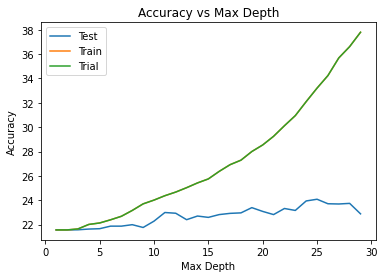

In [6]:
itr = predVal
trial_accuracy=[]
plt.plot(itr, test_accuracy, label = "Test")
plt.plot(itr, train_accuracy, label = "Train")
plt.plot(itr, trial_accuracy, label = "Trial")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()

  0%|          | 0/29 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-package

Classification report for case:  1
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.00      0.00      0.00       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Classification report for case:  2
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.00      0.00      0.00       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 10%|█         | 3/29 [00:49<07:53, 18.21s/it]

Classification report for case:  3
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       1.00      0.00      0.01       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 14%|█▍        | 4/29 [01:20<09:39, 23.18s/it]

Classification report for case:  4
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       1.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       1.00      0.02      0.03       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 17%|█▋        | 5/29 [01:58<11:19, 28.33s/it]

Classification report for case:  5
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       1.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       1.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.95      0.03      0.05       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 21%|██        | 6/29 [02:44<13:12, 34.47s/it]

Classification report for case:  6
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       1.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       1.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.94      0.02      0.05       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.68      0.10      0.17   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 24%|██▍       | 7/29 [03:37<14:54, 40.65s/it]

Classification report for case:  7
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.86      0.01      0.01      1955
           3       0.00      0.00      0.00      1099
           4       1.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       1.00      0.02      0.04       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.68      0.08      0.14   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 28%|██▊       | 8/29 [04:38<16:28, 47.06s/it]

Classification report for case:  8
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.67      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.67      0.00      0.01      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.94      0.02      0.05       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.73      0.13      0.22   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 31%|███       | 9/29 [05:46<17:52, 53.63s/it]

Classification report for case:  9
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.80      0.00      0.01      1955
           3       0.00      0.00      0.00      1099
           4       1.00      0.00      0.01      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       1.00      0.03      0.05       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.71      0.02      0.03   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 34%|███▍      | 10/29 [07:02<19:07, 60.41s/it]

Classification report for case:  10
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.85      0.02      0.04      1955
           3       0.00      0.00      0.00      1099
           4       0.63      0.02      0.04      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.81      0.04      0.08       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.69      0.13      0.22  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 38%|███▊      | 11/29 [08:27<20:23, 67.95s/it]

Classification report for case:  11
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.85      0.03      0.06      1955
           3       0.00      0.00      0.00      1099
           4       0.78      0.06      0.12      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.67      0.05      0.10       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.70      0.25      0.37  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 41%|████▏     | 12/29 [09:57<21:09, 74.69s/it]

Classification report for case:  12
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.69      0.06      0.11      1955
           3       0.00      0.00      0.00      1099
           4       0.78      0.02      0.05      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.73      0.06      0.11       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.69      0.22      0.34  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 45%|████▍     | 13/29 [11:29<21:20, 80.05s/it]

Classification report for case:  13
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.80      0.03      0.05      1955
           3       0.00      0.00      0.00      1099
           4       0.82      0.03      0.05      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.75      0.06      0.11       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.69      0.12      0.20  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 48%|████▊     | 14/29 [13:10<21:35, 86.38s/it]

Classification report for case:  14
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.85      0.02      0.04      1955
           3       1.00      0.00      0.00      1099
           4       0.79      0.02      0.04      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.90      0.04      0.07       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.74      0.29      0.42  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 52%|█████▏    | 15/29 [14:58<21:40, 92.89s/it]

Classification report for case:  15
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.82      0.02      0.04      1955
           3       0.00      0.00      0.00      1099
           4       0.73      0.08      0.14      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.77      0.06      0.11       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.70      0.08      0.15  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 55%|█████▌    | 16/29 [16:51<21:26, 98.94s/it]

Classification report for case:  16
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.86      0.03      0.06      1955
           3       0.00      0.00      0.00      1099
           4       0.69      0.05      0.09      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.63      0.07      0.12       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.70      0.22      0.34  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 59%|█████▊    | 17/29 [18:53<21:10, 105.85s/it]

Classification report for case:  17
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.83      0.03      0.06      1955
           3       0.00      0.00      0.00      1099
           4       0.79      0.06      0.10      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.80      0.06      0.12       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.72      0.23      0.35  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 62%|██████▏   | 18/29 [20:57<20:23, 111.22s/it]

Classification report for case:  18
              precision    recall  f1-score   support

           1       0.15      0.01      0.01      2022
           2       0.73      0.05      0.09      1955
           3       0.00      0.00      0.00      1099
           4       0.78      0.06      0.11      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.80      0.07      0.12       696
          12       0.75      0.01      0.01       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.72      0.18      0.28  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 66%|██████▌   | 19/29 [23:05<19:23, 116.38s/it]

Classification report for case:  19
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.52      0.06      0.10      1955
           3       0.00      0.00      0.00      1099
           4       0.73      0.10      0.17      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.50      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.75      0.07      0.12       696
          12       0.60      0.02      0.03       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.68      0.23      0.35  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 69%|██████▉   | 20/29 [25:20<18:18, 122.04s/it]

Classification report for case:  20
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.56      0.06      0.10      1955
           3       0.12      0.01      0.02      1099
           4       0.71      0.09      0.16      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.60      0.10      0.17       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.69      0.14      0.24  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 72%|███████▏  | 21/29 [27:45<17:10, 128.83s/it]

Classification report for case:  21
              precision    recall  f1-score   support

           1       0.20      0.00      0.00      2022
           2       0.74      0.02      0.05      1955
           3       0.00      0.00      0.00      1099
           4       0.63      0.04      0.07      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.76      0.09      0.17       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.69      0.24      0.36  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 76%|███████▌  | 22/29 [30:15<15:45, 135.08s/it]

Classification report for case:  22
              precision    recall  f1-score   support

           1       0.03      0.00      0.00      2022
           2       0.49      0.06      0.11      1955
           3       0.00      0.00      0.00      1099
           4       0.68      0.10      0.18      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.72      0.09      0.16       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.74      0.15      0.25  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 79%|███████▉  | 23/29 [32:50<14:06, 141.00s/it]

Classification report for case:  23
              precision    recall  f1-score   support

           1       0.03      0.00      0.00      2022
           2       0.67      0.04      0.08      1955
           3       0.15      0.01      0.01      1099
           4       0.68      0.08      0.14      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.60      0.13      0.21       696
          12       1.00      0.01      0.01       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.69      0.23      0.34  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 83%|████████▎ | 24/29 [35:27<12:09, 145.95s/it]

Classification report for case:  24
              precision    recall  f1-score   support

           1       0.14      0.00      0.00      2022
           2       0.60      0.09      0.16      1955
           3       0.17      0.00      0.01      1099
           4       0.65      0.10      0.18      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.40      0.13      0.19       696
          12       0.55      0.07      0.12       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.70      0.27      0.39  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 86%|████████▌ | 25/29 [38:10<10:04, 151.14s/it]

Classification report for case:  25
              precision    recall  f1-score   support

           1       0.17      0.01      0.02      2022
           2       0.39      0.09      0.15      1955
           3       0.00      0.00      0.00      1099
           4       0.66      0.13      0.22      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.54      0.12      0.20       696
          12       0.75      0.01      0.01       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.71      0.29      0.41  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 90%|████████▉ | 26/29 [41:02<07:51, 157.30s/it]

Classification report for case:  26
              precision    recall  f1-score   support

           1       0.08      0.01      0.02      2022
           2       0.71      0.07      0.12      1955
           3       0.05      0.00      0.00      1099
           4       0.69      0.13      0.21      1246
           5       0.00      0.00      0.00       786
           6       1.00      0.00      0.00       809
           7       0.33      0.01      0.01       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.76      0.11      0.20       696
          12       1.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.69      0.31      0.43  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 93%|█████████▎| 27/29 [43:58<05:25, 162.95s/it]

Classification report for case:  27
              precision    recall  f1-score   support

           1       0.18      0.03      0.06      2022
           2       0.67      0.09      0.16      1955
           3       0.29      0.01      0.02      1099
           4       0.66      0.13      0.22      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.77      0.09      0.16       696
          12       1.00      0.01      0.01       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.70      0.15      0.24  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 97%|█████████▋| 28/29 [47:00<02:48, 168.54s/it]

Classification report for case:  28
              precision    recall  f1-score   support

           1       0.18      0.02      0.03      2022
           2       0.24      0.23      0.24      1955
           3       0.17      0.02      0.03      1099
           4       0.63      0.12      0.20      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.38      0.00      0.01       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.63      0.14      0.22       696
          12       0.82      0.02      0.03       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.68      0.11      0.19  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 29/29 [50:06<00:00, 103.67s/it]

Classification report for case:  29
              precision    recall  f1-score   support

           1       0.12      0.00      0.00      2022
           2       0.78      0.03      0.05      1955
           3       0.12      0.01      0.01      1099
           4       0.65      0.06      0.10      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.50      0.00      0.01       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.77      0.08      0.14       696
          12       0.33      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.69      0.25      0.37  

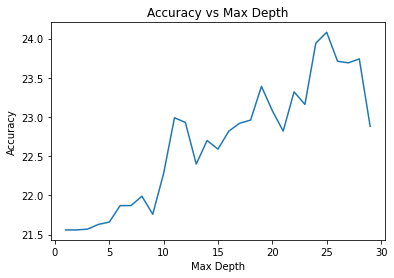

In [ ]:
accuracy = []
predVal = []
for i in tqdm(range(1,30,1)):
    clf = RandomForestClassifier(criterion='gini', max_depth=i, random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    y_true = testLabels
    print("Test Data:")
    print("Classification report for case: ",i)
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(trainData)
    y_true = trainLabels
    print("Train Data:")
    print("Classification report for case: ",i)
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(validationData)
    y_true = validationLabels
    print("Validation Data:")
    print("Classification report for case: ",i)
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
#     accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
#     predVal.append(i)


# plt.plot(predVal, accuracy)
# plt.xlabel('Max Depth')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Max Depth')
# plt.show()

## Criterion

In [ ]:
clf = RandomForestClassifier(criterion='gini', max_depth=25, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = testLabels
print("Test Data:")
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_train)
y_true = trainLabels
print("Train Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_val)
y_true = validationLabels
print("Validation Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))


              precision    recall  f1-score   support

           1       0.17      0.01      0.02      2022
           2       0.39      0.09      0.15      1955
           3       0.00      0.00      0.00      1099
           4       0.66      0.13      0.22      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.54      0.12      0.20       696
          12       0.75      0.01      0.01       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.71      0.29      0.41       565
          18       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = RandomForestClassifier(criterion='entropy', max_depth=25, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = testLabels
print("Test Data:")
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_train)
y_true = trainLabels
print("Train Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_val)
y_true = validationLabels
print("Validation Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

              precision    recall  f1-score   support

           1       0.03      0.00      0.00      2022
           2       0.23      0.11      0.15      1955
           3       0.00      0.00      0.00      1099
           4       0.33      0.10      0.16      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.61      0.06      0.10       696
          12       0.50      0.01      0.01       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.70      0.17      0.27       565
          18       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gini is better

## Number of Estimators

### Estimators Range 1



In [8]:
accuracy = []
predVal = []
itr= [ 150, 180, 210, 250, 280]
for i in tqdm(range(len(itr))):
    clf = RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    y_true = testLabels
    print("Test Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(trainData)
    y_true = trainLabels
    print("Train Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(validationData)
    y_true = validationLabels
    print("Validation Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
#     accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
#     predVal.append(itr[i])


# plt.plot(predVal, accuracy)
# plt.xlabel('Num estimators')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Num estimators')
# plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

Test Data:
Classification report for case:  150
Accuracy % :  24.15
              precision    recall  f1-score   support

           1       0.05      0.00      0.00      2022
           2       0.44      0.10      0.16      1955
           3       0.00      0.00      0.00      1099
           4       0.67      0.13      0.21      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.63      0.10      0.18       696
          12       0.71      0.02      0.04       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  150
Accuracy % :  33.04
              precision    recall  f1-score   support

           1       0.99      0.14      0.24      7076
           2       0.93      0.21      0.35      6842
           3       1.00      0.12      0.21      3842
           4       0.94      0.24      0.38      4363
           5       0.96      0.07      0.13      2751
           6       1.00      0.08      0.15      2831
           7       0.99      0.11      0.20      3250
           8       0.99      0.08      0.15      2341
           9       1.00      0.11      0.19      1992
          10       1.00      0.03      0.06      2083
          11       0.99      0.28      0.43      2433
          12       0.99      0.24      0.39      1908
          13       1.00      0.05      0.09      1722
          14       1.00      0.04      0.07      1878
          15       1.00      0.04      0.08      1745
          16       1.00      0.05      0.10      1721
          17

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 20%|██        | 1/5 [03:20<13:23, 200.92s/it]

Validation Data:
Classification report for case:  150
Accuracy % :  24.19
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.44      0.08      0.14       978
           3       0.00      0.00      0.00       549
           4       0.70      0.15      0.24       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       1.00      0.00      0.01       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.74      0.10      0.18       348
          12       0.67      0.01      0.01       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
       

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  180
Accuracy % :  32.95
              precision    recall  f1-score   support

           1       0.99      0.14      0.24      7076
           2       0.93      0.21      0.34      6842
           3       1.00      0.11      0.21      3842
           4       0.93      0.24      0.38      4363
           5       0.96      0.07      0.13      2751
           6       1.00      0.08      0.15      2831
           7       0.99      0.11      0.20      3250
           8       0.99      0.08      0.15      2341
           9       1.00      0.11      0.20      1992
          10       1.00      0.03      0.06      2083
          11       0.98      0.28      0.43      2433
          12       0.99      0.24      0.38      1908
          13       1.00      0.05      0.10      1722
          14       1.00      0.04      0.08      1878
          15       1.00      0.04      0.07      1745
          16       1.00      0.05      0.10      1721
          17

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 40%|████      | 2/5 [07:19<11:09, 223.03s/it]

Validation Data:
Classification report for case:  180
Accuracy % :  24.26
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.48      0.08      0.14       978
           3       0.18      0.01      0.01       549
           4       0.71      0.14      0.24       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.73      0.10      0.18       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
       

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  210
Accuracy % :  32.7
              precision    recall  f1-score   support

           1       0.99      0.13      0.23      7076
           2       0.93      0.21      0.34      6842
           3       1.00      0.11      0.20      3842
           4       0.93      0.24      0.38      4363
           5       0.95      0.07      0.12      2751
           6       1.00      0.08      0.14      2831
           7       0.99      0.11      0.20      3250
           8       0.99      0.08      0.14      2341
           9       1.00      0.10      0.19      1992
          10       1.00      0.03      0.06      2083
          11       0.98      0.28      0.44      2433
          12       0.98      0.24      0.38      1908
          13       1.00      0.05      0.09      1722
          14       1.00      0.04      0.07      1878
          15       1.00      0.03      0.07      1745
          16       1.00      0.05      0.10      1721
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 60%|██████    | 3/5 [11:51<08:10, 245.23s/it]

Validation Data:
Classification report for case:  210
Accuracy % :  24.26
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.49      0.08      0.14       978
           3       0.10      0.01      0.01       549
           4       0.73      0.14      0.24       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.71      0.10      0.18       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
       

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  250
Accuracy % :  32.59
              precision    recall  f1-score   support

           1       0.99      0.13      0.23      7076
           2       0.93      0.20      0.34      6842
           3       1.00      0.11      0.19      3842
           4       0.94      0.24      0.38      4363
           5       0.95      0.07      0.12      2751
           6       1.00      0.08      0.14      2831
           7       0.99      0.11      0.19      3250
           8       0.99      0.07      0.13      2341
           9       1.00      0.10      0.18      1992
          10       1.00      0.03      0.05      2083
          11       0.98      0.28      0.44      2433
          12       0.98      0.24      0.38      1908
          13       1.00      0.05      0.09      1722
          14       1.00      0.04      0.07      1878
          15       1.00      0.04      0.07      1745
          16       1.00      0.05      0.10      1721
          17

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 80%|████████  | 4/5 [17:27<04:41, 281.34s/it]

Validation Data:
Classification report for case:  250
Accuracy % :  24.28
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.48      0.08      0.14       978
           3       0.11      0.01      0.01       549
           4       0.73      0.14      0.24       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.68      0.11      0.20       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
       

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Classification report for case:  280
Accuracy % :  32.44
              precision    recall  f1-score   support

           1       0.99      0.12      0.22      7076
           2       0.93      0.20      0.33      6842
           3       1.00      0.11      0.19      3842
           4       0.94      0.24      0.38      4363
           5       0.95      0.06      0.12      2751
           6       1.00      0.07      0.14      2831
           7       0.99      0.10      0.19      3250
           8       0.99      0.07      0.13      2341
           9       1.00      0.10      0.17      1992
          10       1.00      0.03      0.06      2083
          11       0.99      0.28      0.43      2433
          12       0.98      0.23      0.38      1908
          13       1.00      0.05      0.09      1722
          14       1.00      0.04      0.07      1878
          15       1.00      0.04      0.07      1745
          16       1.00      0.05      0.10      1721
          17

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 5/5 [23:33<00:00, 282.79s/it]

Validation Data:
Classification report for case:  280
Accuracy % :  24.36
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.53      0.09      0.16       978
           3       0.16      0.01      0.01       549
           4       0.72      0.14      0.24       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.66      0.11      0.18       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
       

In [ ]:
X_train, X_test, y_train, y_test = trainData, testData, trainLabels, testLabels


#### Estimators Range 2

In [ ]:
# accuracy = []
# predVal = []
# itr= [200, 250, 300, 400]

# for i in tqdm(range(len(itr))):
#     clf = RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=itr[i], random_state=0)
#     clf.fit(trainData, trainLabels)
#     y_pred = clf.predict(testData)
#     print("Classification report for case: ",itr[i])
#     accuracy = round(accuracy_score(y_pred, y_test) * 100,2)
#     print("Accuracy: ", accuracy)
#     print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
#     # accuracy.append(round(accuracy_score(y_pred,testLabels) * 100,2))
#     # predVal.append(predVal, float(itr[i]))


# # plt.plot(predVal, accuracy)
# # plt.xlabel('Num estimators')
# # plt.ylabel('Accuracy')
# # plt.title('Accuracy vs Num estimators')
# # plt.show()

### Estimators Range 2

In [10]:
accuracy = []
predVal = []
itr= [200, 250, 300, 400]

for i in tqdm(range(len(itr))):
    clf = RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    y_true = testLabels
    print("Test Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(trainData)
    y_true = trainLabels
    print("Train Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(validationData)
    y_true = validationLabels
    print("Validation Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

  0%|          | 0/4 [00:00<?, ?it/s]

## RFC Final


### criterion='gini', max_depth=25, n_estimators=250
### Accuracy:  24.51

In [ ]:
clf = RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=250, random_state=0)
clf.fit(trainData, trainLabels)
y_pred = clf.predict(X_test)
y_true = testLabels
print("Test Data:")
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_train)
y_true = trainLabels
print("Train Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_val)
y_true = validationLabels
print("Validation Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

Accuracy:  24.51
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.38      0.13      0.20      1955
           3       0.00      0.00      0.00      1099
           4       0.68      0.13      0.22      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.66      0.12      0.21       696
          12       1.00      0.00      0.01       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.72      0.33      0.45       565
          

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
filename = 'finalModelRF'
pk.dump(clf,open(filename,'wb'))